<a href="https://colab.research.google.com/github/batchuraja484/ML_Regression_Problem_MPG_Predict/blob/main/MPG_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the required Libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#defining the columns
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

In [3]:
df1=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",names=cols,skipinitialspace=True,comment = '\t',sep= " ",na_values = "?")

In [4]:
data=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",names=cols,skipinitialspace=True,comment = '\t',sep= " ",na_values = "?")

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [6]:
df1.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

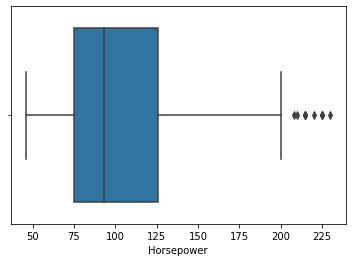

In [7]:
sns.boxplot(x=df1['Horsepower'])

In [8]:
hpmedian=df1['Horsepower'].median()

In [9]:
df1['Horsepower']=df1['Horsepower'].fillna(hpmedian)

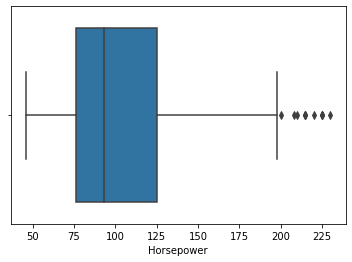

In [10]:
sns.boxplot(x=df1['Horsepower'])

In [11]:
#Category Distribution
df1["Cylinders"].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64

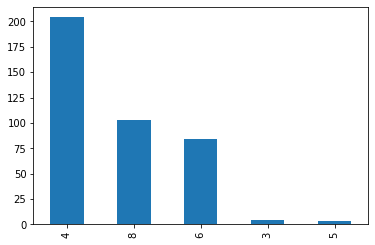

In [12]:
df1["Cylinders"].value_counts().plot.bar()

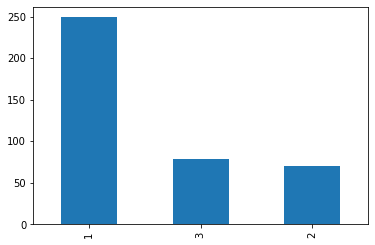

In [13]:
df1["Origin"].value_counts().plot.bar()

In [14]:
df1["Origin"].value_counts()/len(df1)
df1["Cylinders"].value_counts()/len(df1)

4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [15]:
df1.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

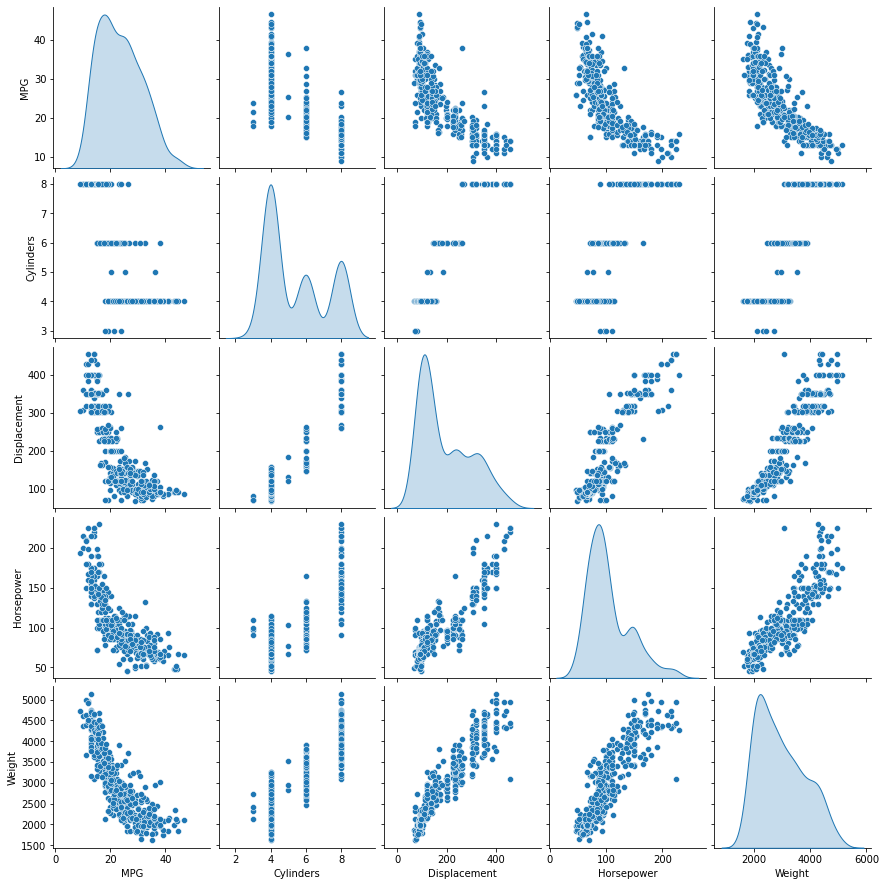

In [16]:
sns.pairplot(df1[['MPG','Cylinders','Displacement', 'Horsepower', 'Weight']],diag_kind='kde')

# Approach 1 using Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=df1.drop(columns=['MPG'],axis=1)
Y=df1['MPG']

In [19]:
X.shape,Y.shape

((398, 7), (398,))

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [21]:
X_train.shape,X_test.shape

((278, 7), (120, 7))

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr_mdl=LinearRegression(normalize=True)

In [24]:
lr_mdl.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [25]:
lr_mdl_predict=lr_mdl.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score(Y_test,lr_mdl_predict)

0.8384465289489116

In [29]:
y1_true=[5,6,7]
y1_pred=[7,9,12]
r2_score(y1_true,y1_pred)

-18.0

In [30]:
print('MAE is',mean_absolute_error(Y_test,lr_mdl_predict))

MAE is 2.369392146291413


In [31]:
np.sqrt(38/3)

3.559026084010437

In [32]:
((2/5)+(3/6)+(5/7))*100/3

53.80952380952382

In [33]:
mean_squared_error(Y_test,lr_mdl_predict)

9.271774044606088

In [34]:
np.sqrt(mean_squared_error(Y_test,lr_mdl_predict))

3.044958791938914

In [35]:
print(X_train['Cylinders'].value_counts())
print(X_test['Cylinders'].value_counts())

4    138
8     70
6     64
5      3
3      3
Name: Cylinders, dtype: int64
4    66
8    33
6    20
3     1
Name: Cylinders, dtype: int64


In [36]:
print(X_train['Origin'].value_counts())
print(X_test['Origin'].value_counts())

1    176
3     55
2     47
Name: Origin, dtype: int64
1    73
3    24
2    23
Name: Origin, dtype: int64


In [37]:
def regmdl_accuracies(ytrue,ypred):
  print("MAE Value is",mean_absolute_error(ytrue,ypred))
  print("MSE Value is",mean_squared_error(ytrue,ypred))
  print("RMSE Value is",np.sqrt(mean_squared_error(ytrue,ypred)))
  print("R2 Value is",r2_score(ytrue,ypred))


In [38]:
regmdl_accuracies(Y_test,lr_mdl_predict)

MAE Value is 2.369392146291413
MSE Value is 9.271774044606088
RMSE Value is 3.044958791938914
R2 Value is 0.8384465289489116


# Using Approach 2 StrightFiledShuffleSplit


In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

In [40]:
sfss=StratifiedShuffleSplit(n_splits=5,test_size=0.3,random_state=42)

In [41]:
sfss.get_n_splits(X,Y)

5

In [42]:
df1['Cylinders'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64

In [43]:
df1[df1['Cylinders']==5]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
274,20.3,5,131.0,103.0,2830.0,15.9,78,2
297,25.4,5,183.0,77.0,3530.0,20.1,79,2
327,36.4,5,121.0,67.0,2950.0,19.9,80,2


In [44]:
for train_index,test_index in sfss.split(df1,df1['Cylinders']):
  print("Train Index is :", df1.iloc[train_index]['Cylinders'].value_counts()/len(df1.iloc[train_index]))
  print("Test Index is :",df1.iloc[test_index]['Cylinders'].value_counts()/len(df1.iloc[test_index]))

Train Index is : 4    0.510791
8    0.258993
6    0.212230
3    0.010791
5    0.007194
Name: Cylinders, dtype: float64
Test Index is : 4    0.516667
8    0.258333
6    0.208333
5    0.008333
3    0.008333
Name: Cylinders, dtype: float64
Train Index is : 4    0.510791
8    0.258993
6    0.212230
3    0.010791
5    0.007194
Name: Cylinders, dtype: float64
Test Index is : 4    0.516667
8    0.258333
6    0.208333
5    0.008333
3    0.008333
Name: Cylinders, dtype: float64
Train Index is : 4    0.510791
8    0.258993
6    0.212230
3    0.010791
5    0.007194
Name: Cylinders, dtype: float64
Test Index is : 4    0.516667
8    0.258333
6    0.208333
5    0.008333
3    0.008333
Name: Cylinders, dtype: float64
Train Index is : 4    0.510791
8    0.258993
6    0.212230
3    0.010791
5    0.007194
Name: Cylinders, dtype: float64
Test Index is : 4    0.516667
8    0.258333
6    0.208333
5    0.008333
3    0.008333
Name: Cylinders, dtype: float64
Train Index is : 4    0.510791
8    0.258993
6    0.

In [45]:
#Preprocessing the Origin Column
def pre_processing_orign(df):
  df['Origin']=df['Origin'].map({1:'India',2:'USA',3:'China'})
  return df

In [46]:
df1=pre_processing_orign(df1)

In [47]:
#df1=pd.get_dummies(df1)

In [48]:
df1

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,India
1,15.0,8,350.0,165.0,3693.0,11.5,70,India
2,18.0,8,318.0,150.0,3436.0,11.0,70,India
3,16.0,8,304.0,150.0,3433.0,12.0,70,India
4,17.0,8,302.0,140.0,3449.0,10.5,70,India
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,India
394,44.0,4,97.0,52.0,2130.0,24.6,82,USA
395,32.0,4,135.0,84.0,2295.0,11.6,82,India
396,28.0,4,120.0,79.0,2625.0,18.6,82,India


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 25.0+ KB


In [50]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
cat_data=df1[['Origin']]
cat_data.head(5)

,Origin
0,India
1,India
2,India
3,India
4,India


In [52]:
cat_encoder=OneHotEncoder()
cat_encode_data=cat_encoder.fit_transform(cat_data).toarray()

In [53]:
data_hot_encoded=pd.DataFrame(cat_encode_data,index=df1.index,columns=cat_encoder.categories_)

In [54]:
data_hot_encoded

,China,India,USA
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
393,0.0,1.0,0.0
394,0.0,0.0,1.0
395,0.0,1.0,0.0
396,0.0,1.0,0.0


In [55]:
df1.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,India
1,15.0,8,350.0,165.0,3693.0,11.5,70,India
2,18.0,8,318.0,150.0,3436.0,11.0,70,India
3,16.0,8,304.0,150.0,3433.0,12.0,70,India
4,17.0,8,302.0,140.0,3449.0,10.5,70,India


Handling Missing Values


In [56]:
df1.info()
num_cols=df1.iloc[:,:-1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 25.0+ KB


In [57]:
num_cols

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82
394,44.0,4,97.0,52.0,2130.0,24.6,82
395,32.0,4,135.0,84.0,2295.0,11.6,82
396,28.0,4,120.0,79.0,2625.0,18.6,82


In [58]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(num_cols)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [59]:
imputer.statistics_

array([  23. ,    4. ,  148.5,   93.5, 2803.5,   15.5,   76. ])

In [60]:
df1.median().values

array([  23. ,    4. ,  148.5,   93.5, 2803.5,   15.5,   76. ])

In [61]:
impute_x=imputer.transform(num_cols)

In [62]:
impute_x.ndim

2

In [63]:
impute_df=pd.DataFrame(impute_x,columns=num_cols.columns,index=num_cols.index)

In [64]:
impute_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    float64
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    float64
dtypes: float64(7)
memory usage: 21.9 KB


In [65]:
impute_df.drop(columns=['MPG'],inplace=True,axis=1)

In [66]:
impute_df

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,8.0,307.0,130.0,3504.0,12.0,70.0
1,8.0,350.0,165.0,3693.0,11.5,70.0
2,8.0,318.0,150.0,3436.0,11.0,70.0
3,8.0,304.0,150.0,3433.0,12.0,70.0
4,8.0,302.0,140.0,3449.0,10.5,70.0
...,...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,15.6,82.0
394,4.0,97.0,52.0,2130.0,24.6,82.0
395,4.0,135.0,84.0,2295.0,11.6,82.0
396,4.0,120.0,79.0,2625.0,18.6,82.0


In [67]:
impute_df.iloc[:,4]/impute_df.iloc[:,0]

0      1.5000
1      1.4375
2      1.3750
3      1.5000
4      1.3125
        ...  
393    3.9000
394    6.1500
395    2.9000
396    4.6500
397    4.8500
Length: 398, dtype: float64

Create a Custom class to create a new features using baseestimator and Transformermixin


In [68]:
from sklearn.base import BaseEstimator, TransformerMixin

acc_ix,hsp_ix,cyln_ix=4,2,0

class addingattributes(BaseEstimator,TransformerMixin):
  def __init__(self,acc_power_calc=True):
    self.acc_power_calc=acc_power_calc
  def fit(self,Xdf,y=None):
    return self
  def transform(self,Xdf):
    acc_on_cyln=Xdf[:,acc_ix]/Xdf[:,cyln_ix]
    if self.acc_power_calc:
      acc_on_hsp=Xdf[:,acc_ix]/Xdf[:,hsp_ix]
      return np.c_[Xdf,acc_on_cyln,acc_on_hsp]
    print('hi')
    return np.c_[Xdf,acc_on_cyln]

coladdtransformer=addingattributes(acc_power_calc=True)
data_df_addition=coladdtransformer.transform(impute_df.values)
data_df_addition[0]


array([8.00000000e+00, 3.07000000e+02, 1.30000000e+02, 3.50400000e+03,
       1.20000000e+01, 7.00000000e+01, 1.50000000e+00, 9.23076923e-02])

### Creating Pipline Tasks

In [69]:
data_lables=data['MPG']
data=data.drop(columns=['MPG'],axis=1)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cylinders     398 non-null    int64  
 1   Displacement  398 non-null    float64
 2   Horsepower    392 non-null    float64
 3   Weight        398 non-null    float64
 4   Acceleration  398 non-null    float64
 5   Model Year    398 non-null    int64  
 6   Origin        398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_types=['float64','int64']

num_data=data.select_dtypes(include=num_types)
num_pipeline=Pipeline([('imputer',SimpleImputer(strategy="median")),
                       ('attr_Addition',addingattributes()),
                       ('Standardscaling',StandardScaler())])

In [72]:
num_data.drop(columns=['Origin'],inplace=True)

In [73]:
num_process_data=num_pipeline.fit_transform(num_data)
num_process_data[0]

array([ 1.49819126,  1.0906037 ,  0.67311762,  0.63086987, -1.29549834,
       -1.62742629, -1.42777381, -1.02693601])

Transforming categorical columns


In [84]:
from sklearn.compose import ColumnTransformer
num_columns=list(num_data)
cat_columns=["Origin"]
full_pipline=ColumnTransformer([('numcols',num_pipeline,num_columns),
                            ('cat cols',OneHotEncoder(),cat_columns)])
prepared_data=full_pipline.fit_transform(data)
prepared_data[0]

array([ 1.49819126,  1.0906037 ,  0.67311762,  0.63086987, -1.29549834,
       -1.62742629, -1.42777381, -1.02693601,  1.        ,  0.        ,
        0.        ])

Selecting Model and Training Models
1. Linear Regression
2. Decision Tree
3. Random Forest
4. SVM Regressor

In [90]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(prepared_data,data_lables)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
#testing with sample
sample_data=data.iloc[:5]
sample_data_lables=data_lables.iloc[:5]

sample_data_prepared=full_pipline.transform(sample_data)

In [87]:
sample_data_prepared[0]

array([ 1.49819126,  1.0906037 ,  0.67311762,  0.63086987, -1.29549834,
       -1.62742629, -1.42777381, -1.02693601,  1.        ,  0.        ,
        0.        ])

In [88]:
print(sample_data_prepared[0])
print(prepared_data[0])

[ 1.49819126  1.0906037   0.67311762  0.63086987 -1.29549834 -1.62742629
 -1.42777381 -1.02693601  1.          0.          0.        ]
[ 1.49819126  1.0906037   0.67311762  0.63086987 -1.29549834 -1.62742629
 -1.42777381 -1.02693601  1.          0.          0.        ]


In [91]:
print("sample prediction using linear regression",lin_reg.predict(sample_data_prepared))

sample prediction using linear regression [14.79880021 13.98868037 15.38270144 14.91873576 15.6309951 ]


In [92]:
lin_predict=lin_reg.predict(prepared_data)

In [94]:
from sklearn.metrics import mean_squared_error

lin_mse=mean_squared_error(lin_predict,data_lables)
print('RMSE of Linerar Regression',np.sqrt(lin_mse))


RMSE of Linerar Regression 2.9976662079915086


In [95]:
from sklearn.tree import DecisionTreeRegressor

In [97]:
dt_mdl=DecisionTreeRegressor()
dt_mdl.fit(prepared_data,data_lables)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [98]:
dt_prediction=dt_mdl.predict(prepared_data)
dt_mse=mean_squared_error(dt_prediction,data_lables)
print('RMSE of DT model',dt_mse)

RMSE of DT model 0.0


In [107]:
from sklearn.metrics import SCORERS
#sorted(sklearn.metrics.SCORERS.keys())

In [117]:
from sklearn.model_selection import cross_val_score

dt_kfold_scores=cross_val_score(dt_mdl,prepared_data,data_lables,scoring='neg_mean_squared_error',cv=10 )
print(np.sqrt(-dt_kfold_scores).mean())


3.85785834312097
